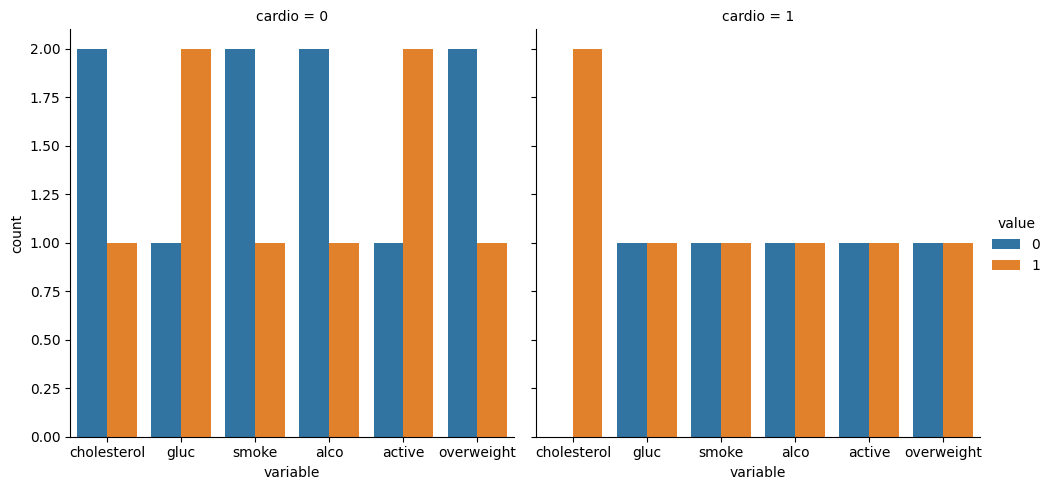

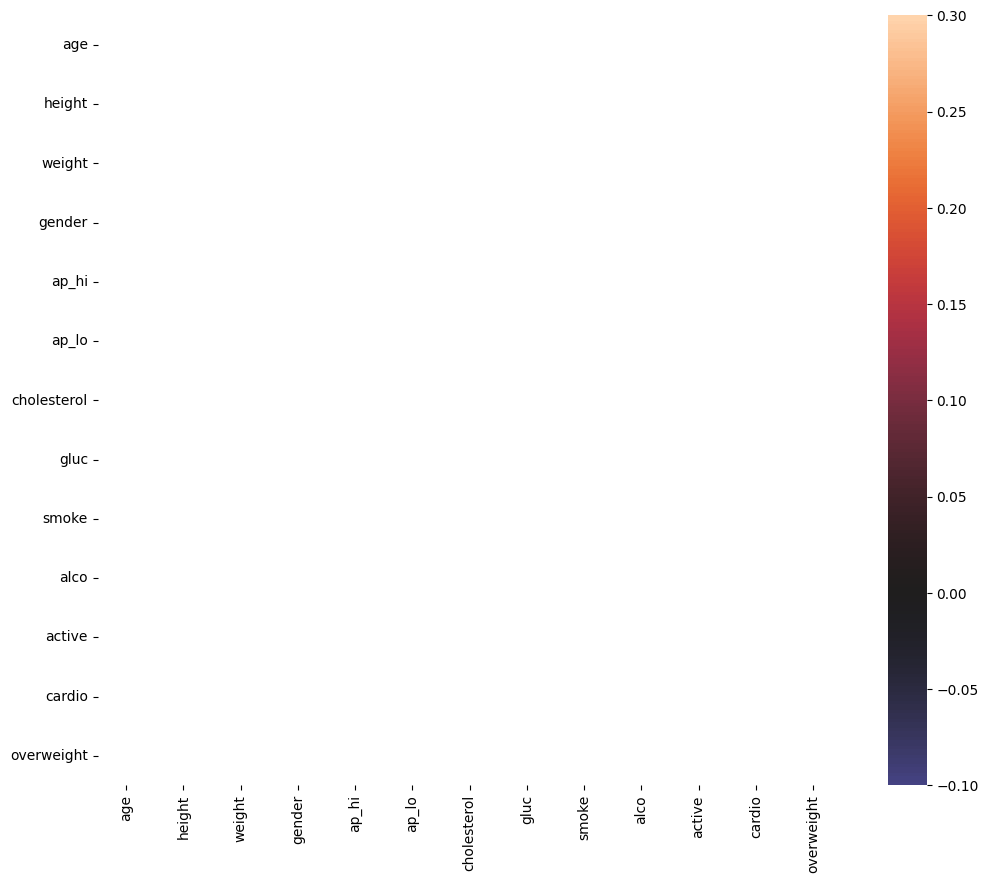

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"C:\Users\ayush\OneDrive\Desktop\medical_examination.csv")
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) > 25).astype(int)
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
    catplot = sns.catplot(x='variable', hue='value', col='cardio', kind='count', data=df_cat)
    fig = catplot.fig
    fig.savefig('catplot.png')
    return fig

def draw_heat_map():
    df_heat = df.copy()
    df_heat = df_heat[df_heat['ap_lo'] <= df_heat['ap_hi']]
    df_heat = df_heat[df_heat['height'] >= df_heat['height'].quantile(0.025)]
    df_heat = df_heat[df_heat['height'] <= df_heat['height'].quantile(0.975)]
    df_heat = df_heat[df_heat['weight'] >= df_heat['weight'].quantile(0.025)]
    df_heat = df_heat[df_heat['weight'] <= df_heat['weight'].quantile(0.975)]
    corr = df_heat.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', linewidths=.5, ax=ax, vmax=0.3, vmin=-0.1, center=0)
    fig.savefig('heatmap.png')
    return fig

if __name__ == "__main__":
    draw_cat_plot()
    draw_heat_map()
